## Assignment_1_李涛_218119010076

In [2]:
import os

In [3]:
import pandas as pd

#### 读入数据

In [4]:
cell = pd.read_csv('d:\Documents\AdvancedStatisticsMachineLearning\segmentationOriginal.csv')

### 1. Data understanding

#### 预览数据头部信息

In [5]:
cell.head()

,Cell,Case,Class,AngleCh1,AngleStatusCh1,AreaCh1,AreaStatusCh1,AvgIntenCh1,AvgIntenCh2,AvgIntenCh3,...,VarIntenCh1,VarIntenCh3,VarIntenCh4,VarIntenStatusCh1,VarIntenStatusCh3,VarIntenStatusCh4,WidthCh1,WidthStatusCh1,XCentroid,YCentroid
0,207827637,Test,PS,143.247705,1,185,0,15.711864,3.954802,9.548023,...,12.474676,7.609035,2.714100,0,2,2,10.642974,2,42,14
1,207932307,Train,PS,133.752037,0,819,1,31.923274,205.878517,69.916880,...,18.809225,56.715352,118.388139,0,0,0,32.161261,1,215,347
2,207932463,Train,WS,106.646387,0,431,0,28.038835,115.315534,63.941748,...,17.295643,37.671053,49.470524,0,0,0,21.185525,0,371,252
3,207932470,Train,PS,69.150325,0,298,0,19.456140,101.294737,28.217544,...,13.818968,30.005643,24.749537,0,0,2,13.392830,0,487,295
4,207932455,Test,PS,2.887837,2,285,0,24.275735,111.415441,20.474265,...,15.407972,20.504288,45.450457,0,0,0,13.198561,0,283,159


In [6]:
list_count = list(cell.Case)

In [7]:
print('Test数据量为%s个，Train数据量为%s个' %(list_count.count('Test'), (list_count.count('Train'))))

Test数据量为1010个，Train数据量为1009个


### 2. Select the training set
#### 分离出tag为“Train”的数据作为training set

In [8]:
segTrain = cell[cell.Case == "Train"]

#### 查询training set的行列数

In [9]:
segTrain.shape

(1009, 119)

#### 分离出tag为“Test”的数据作为test set

In [10]:
segTest = cell[cell.Case == 'Test']

#### 查询training set的行列数

In [11]:
segTest.shape

(1010, 119)

## 数据清洗

#### 查看pandas模块中drop方法函数的帮助文档

In [12]:
help(cellTrain.drop)

NameError: name 'cellTrain' is not defined

#### 列出training set的列字段

In [13]:
segTrain.columns

Index(['Cell', 'Case', 'Class', 'AngleCh1', 'AngleStatusCh1', 'AreaCh1',
       'AreaStatusCh1', 'AvgIntenCh1', 'AvgIntenCh2', 'AvgIntenCh3',
       ...
       'VarIntenCh1', 'VarIntenCh3', 'VarIntenCh4', 'VarIntenStatusCh1',
       'VarIntenStatusCh3', 'VarIntenStatusCh4', 'WidthCh1', 'WidthStatusCh1',
       'XCentroid', 'YCentroid'],
      dtype='object', length=119)

#### 移除第1、2、3列

In [14]:
segTrainX = segTrain.drop(['Cell', 'Case', 'Class'], axis=1)

#### 检查training set的行列数

In [15]:
segTrainX.shape

(1009, 116)

#### 再次查看training set剩下的列名称

In [16]:
segTrainX.columns

Index(['AngleCh1', 'AngleStatusCh1', 'AreaCh1', 'AreaStatusCh1', 'AvgIntenCh1',
       'AvgIntenCh2', 'AvgIntenCh3', 'AvgIntenCh4', 'AvgIntenStatusCh1',
       'AvgIntenStatusCh2',
       ...
       'VarIntenCh1', 'VarIntenCh3', 'VarIntenCh4', 'VarIntenStatusCh1',
       'VarIntenStatusCh3', 'VarIntenStatusCh4', 'WidthCh1', 'WidthStatusCh1',
       'XCentroid', 'YCentroid'],
      dtype='object', length=116)

In [17]:
type(segTrainX)

pandas.core.frame.DataFrame

In [18]:
columns_list = segTrainX.columns.tolist()

In [19]:
columns_list

['AngleCh1',
 'AngleStatusCh1',
 'AreaCh1',
 'AreaStatusCh1',
 'AvgIntenCh1',
 'AvgIntenCh2',
 'AvgIntenCh3',
 'AvgIntenCh4',
 'AvgIntenStatusCh1',
 'AvgIntenStatusCh2',
 'AvgIntenStatusCh3',
 'AvgIntenStatusCh4',
 'ConvexHullAreaRatioCh1',
 'ConvexHullAreaRatioStatusCh1',
 'ConvexHullPerimRatioCh1',
 'ConvexHullPerimRatioStatusCh1',
 'DiffIntenDensityCh1',
 'DiffIntenDensityCh3',
 'DiffIntenDensityCh4',
 'DiffIntenDensityStatusCh1',
 'DiffIntenDensityStatusCh3',
 'DiffIntenDensityStatusCh4',
 'EntropyIntenCh1',
 'EntropyIntenCh3',
 'EntropyIntenCh4',
 'EntropyIntenStatusCh1',
 'EntropyIntenStatusCh3',
 'EntropyIntenStatusCh4',
 'EqCircDiamCh1',
 'EqCircDiamStatusCh1',
 'EqEllipseLWRCh1',
 'EqEllipseLWRStatusCh1',
 'EqEllipseOblateVolCh1',
 'EqEllipseOblateVolStatusCh1',
 'EqEllipseProlateVolCh1',
 'EqEllipseProlateVolStatusCh1',
 'EqSphereAreaCh1',
 'EqSphereAreaStatusCh1',
 'EqSphereVolCh1',
 'EqSphereVolStatusCh1',
 'FiberAlign2Ch3',
 'FiberAlign2Ch4',
 'FiberAlign2StatusCh3',
 'Fib

In [20]:
len(columns_list)

116

#### 检查Status列是否存在

In [21]:
# status = [] # an empty list
# for name in cellTrainX.columns:
#     if "Status" in name:
#         status.append(name) # append variable names

In [22]:
status = [] # an empty list
for name in columns_list:
    if "Status" in name:
        status.append(name) # append variable names

In [23]:
status

['AngleStatusCh1',
 'AreaStatusCh1',
 'AvgIntenStatusCh1',
 'AvgIntenStatusCh2',
 'AvgIntenStatusCh3',
 'AvgIntenStatusCh4',
 'ConvexHullAreaRatioStatusCh1',
 'ConvexHullPerimRatioStatusCh1',
 'DiffIntenDensityStatusCh1',
 'DiffIntenDensityStatusCh3',
 'DiffIntenDensityStatusCh4',
 'EntropyIntenStatusCh1',
 'EntropyIntenStatusCh3',
 'EntropyIntenStatusCh4',
 'EqCircDiamStatusCh1',
 'EqEllipseLWRStatusCh1',
 'EqEllipseOblateVolStatusCh1',
 'EqEllipseProlateVolStatusCh1',
 'EqSphereAreaStatusCh1',
 'EqSphereVolStatusCh1',
 'FiberAlign2StatusCh3',
 'FiberAlign2StatusCh4',
 'FiberLengthStatusCh1',
 'FiberWidthStatusCh1',
 'IntenCoocASMStatusCh3',
 'IntenCoocASMStatusCh4',
 'IntenCoocContrastStatusCh3',
 'IntenCoocContrastStatusCh4',
 'IntenCoocEntropyStatusCh3',
 'IntenCoocEntropyStatusCh4',
 'IntenCoocMaxStatusCh3',
 'IntenCoocMaxStatusCh4',
 'KurtIntenStatusCh1',
 'KurtIntenStatusCh3',
 'KurtIntenStatusCh4',
 'LengthStatusCh1',
 'MemberAvgAvgIntenStatusCh2',
 'MemberAvgTotalIntenStatusCh

In [24]:
len(status)

58

#### 去掉包含status的列

In [25]:
segTrainXNC = segTrainX.drop(status,axis=1)

#### 剩下1009行，58列

In [26]:
segTrainXNC.shape

(1009, 58)

In [27]:
segTrainXNC

,AngleCh1,AreaCh1,AvgIntenCh1,AvgIntenCh2,AvgIntenCh3,AvgIntenCh4,ConvexHullAreaRatioCh1,ConvexHullPerimRatioCh1,DiffIntenDensityCh1,DiffIntenDensityCh3,...,TotalIntenCh1,TotalIntenCh2,TotalIntenCh3,TotalIntenCh4,VarIntenCh1,VarIntenCh3,VarIntenCh4,WidthCh1,XCentroid,YCentroid
1,133.752037,819,31.923274,205.878517,69.916880,164.153453,1.263158,0.797080,31.875000,43.122283,...,24964,160997,54675,128368,18.809225,56.715352,118.388139,32.161261,215,347
2,106.646387,431,28.038835,115.315534,63.941748,106.696602,1.053310,0.935475,32.487710,35.985770,...,11552,47510,26344,43959,17.295643,37.671053,49.470524,21.185525,371,252
3,69.150325,298,19.456140,101.294737,28.217544,31.028070,1.202625,0.865829,26.732283,22.917323,...,5545,28869,8042,8843,13.818968,30.005643,24.749537,13.392830,487,295
11,109.416426,256,18.828571,125.938776,13.600000,46.800000,1.081871,0.920460,28.020045,14.870824,...,4613,30855,3332,11466,13.922937,18.643027,40.331747,17.546861,211,495
14,104.278654,258,17.570850,124.368421,22.461538,71.206478,1.075728,0.931300,27.876106,16.119469,...,4340,30719,5548,17588,12.324971,17.747143,41.928533,17.660339,172,207
15,77.991943,358,42.283626,217.131579,42.321637,67.540936,1.037830,0.961270,43.309375,43.365625,...,14461,74259,14474,23099,20.956477,42.316360,66.965709,19.430555,276,385
16,13.659972,158,31.410596,102.211921,41.490066,116.119205,1.379310,0.896039,38.450382,37.648855,...,4743,15434,6265,17534,20.585879,40.653090,109.643609,17.396021,239,404
18,106.844369,315,294.767442,491.734219,193.435216,400.451827,1.014516,0.977544,154.578014,100.315603,...,88725,148012,58224,120536,201.368687,152.312103,305.582829,20.694491,95,95
22,84.654036,246,582.795745,244.344681,86.400000,65.880851,1.038540,0.969828,200.117783,72.561201,...,136957,57421,20304,15482,307.296185,110.351516,52.986817,17.519831,438,16
24,123.793871,223,375.046948,292.183099,112.103286,464.544601,1.011261,0.985820,124.297710,78.974555,...,79885,62235,23878,98948,164.780884,179.791582,363.499868,17.036678,386,14


### 5. Pick out low variance feature(s)
### 计算每一列的方差，移除方差为0和几乎为0的列

In [28]:
import numpy as np

In [32]:
near_zero_var = np.std(segTrainX)

In [33]:
near_zero_var[near_zero_var < 0.01]

MemberAvgAvgIntenStatusCh2      0.0
MemberAvgTotalIntenStatusCh2    0.0
dtype: float64

In [34]:
near_zero_var = near_zero_var[near_zero_var < 0.01]

In [35]:
near_zero_var = near_zero_var.to_dict()

In [36]:
keys = []
for key in near_zero_var:
    keys.append(key)

In [37]:
''.join(keys[0])

'MemberAvgAvgIntenStatusCh2'

In [38]:
segTrainXV = segTrainX.drop(keys, axis=1)

In [39]:
segTrainXV.shape

(1009, 114)

### 6. Differentiate categorical features from numeric features

#### 列名中含有“status”的为分类数据，其余不含“status”的为数值型数据。

### 7.Transform skewed feature(s) by Box-Cox Transformation

####  The column VarIntenCh3 measures the standard deviation of the intensity of the pixels in the actin filaments (肌動蛋白絲)

In [40]:
print('%s is much greater than 20!' %(segTrainX.VarIntenCh3.max()/segTrainX.VarIntenCh3.min()))

870.8872472027832 is much greater than 20!


In [41]:
print('The skewness is %s' %segTrainX.VarIntenCh3.skew())

The skewness is 2.398751688087387


In [42]:
from scipy.special import boxcox1p

In [43]:
from scipy import stats

In [44]:
segPP = boxcox1p(segTrainX,0.1)

In [45]:
segPP

,AngleCh1,AngleStatusCh1,AreaCh1,AreaStatusCh1,AvgIntenCh1,AvgIntenCh2,AvgIntenCh3,AvgIntenCh4,AvgIntenStatusCh1,AvgIntenStatusCh2,...,VarIntenCh1,VarIntenCh3,VarIntenCh4,VarIntenStatusCh1,VarIntenStatusCh3,VarIntenStatusCh4,WidthCh1,WidthStatusCh1,XCentroid,YCentroid
1,6.328772,0.000000,9.560565,0.717735,4.182419,7.044001,5.313518,6.664365,0.000000,0.000000,...,3.479902,5.001308,6.132294,0.000000,0.000000,0.000000,4.192637,0.717735,7.117699,7.953864
2,5.966140,0.000000,8.346295,0.000000,4.005477,6.090286,5.179323,5.966885,0.000000,0.000000,...,3.373182,4.412476,4.801434,0.000000,0.000000,0.000000,3.633488,0.000000,8.074001,7.390499
3,5.296884,0.000000,7.683455,0.000000,3.523290,5.884931,4.014073,4.143376,0.000000,0.000000,...,3.094285,4.097564,3.838115,0.000000,0.000000,1.161232,3.056135,0.000000,8.571286,7.665632
11,6.006758,0.000000,7.417801,0.000000,3.481218,6.231529,3.074807,4.721186,0.000000,0.000000,...,3.103443,3.468550,4.508696,0.000000,0.000000,1.161232,3.391433,0.000000,7.085732,8.601509
14,5.930670,0.000000,7.431308,0.000000,3.393164,6.211336,3.709943,5.341139,0.000000,0.000000,...,2.955871,3.405824,4.563797,0.000000,0.000000,1.161232,3.399604,0.000000,6.741895,7.053218
15,5.479548,0.000000,8.009823,0.000000,4.575799,7.134517,4.577078,5.261422,0.000000,0.000000,...,3.619346,4.576901,5.248565,0.000000,0.000000,0.000000,3.521598,0.000000,7.548822,8.140896
16,3.080168,1.161232,6.601209,0.000000,4.160178,5.899116,4.548852,6.101369,0.000000,0.000000,...,3.596182,4.519937,6.010048,0.000000,0.000000,0.000000,3.380501,0.000000,7.299005,8.228272
18,5.969075,0.000000,7.781513,0.000000,7.664243,8.589225,6.938599,8.212239,0.717735,0.717735,...,7.006476,6.540843,7.727798,0.717735,0.717735,0.717735,3.603008,0.000000,5.784365,5.784365
22,5.605396,0.000000,7.348810,0.000000,8.907151,7.337148,5.636917,5.224049,0.717735,0.000000,...,7.737680,6.020262,4.901458,0.717735,0.000000,0.000000,3.389480,0.000000,8.375808,3.275317
24,6.203891,0.000000,7.180065,0.000000,8.093568,7.648748,6.045288,8.484007,0.717735,0.000000,...,6.670685,6.815811,8.037226,0.717735,0.000000,0.717735,3.354132,0.000000,8.145590,3.110194


### 8. Perform the dimensionality reduction by Principal Component Analysis (PCA)

In [46]:
from sklearn.decomposition import PCA

In [47]:
pca = PCA(n_components='mle')

In [48]:
pca.fit(segTrainXNC)

PCA(copy=True, iterated_power='auto', n_components='mle', random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [49]:
len(pca.explained_variance_ratio_)

57

### 9. Filter out redundant (numeric) features according to their correlation

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
segTrainXNC.corr()

,AngleCh1,AreaCh1,AvgIntenCh1,AvgIntenCh2,AvgIntenCh3,AvgIntenCh4,ConvexHullAreaRatioCh1,ConvexHullPerimRatioCh1,DiffIntenDensityCh1,DiffIntenDensityCh3,...,TotalIntenCh1,TotalIntenCh2,TotalIntenCh3,TotalIntenCh4,VarIntenCh1,VarIntenCh3,VarIntenCh4,WidthCh1,XCentroid,YCentroid
AngleCh1,1.000000,-0.002627,-0.043008,-0.019447,-0.062484,-0.023841,-0.051612,0.041737,-0.074435,-0.071855,...,-0.011207,-0.009682,-0.043726,-0.030298,-0.049510,-0.057664,-0.042766,-0.053412,-0.056506,-0.055270
AreaCh1,-0.002627,1.000000,-0.025297,-0.153303,-0.139352,-0.076807,0.328290,-0.476167,-0.063360,-0.139386,...,0.352110,0.346200,0.342010,0.333101,0.018524,-0.081639,-0.013108,0.842734,-0.033862,-0.110563
AvgIntenCh1,-0.043008,-0.025297,1.000000,0.525217,0.273403,0.382298,-0.260242,0.324158,0.951805,0.227204,...,0.765743,0.461055,0.233257,0.329530,0.949776,0.325049,0.330558,-0.015126,-0.079986,-0.052917
AvgIntenCh2,-0.019447,-0.153303,0.525217,1.000000,0.183599,0.573899,-0.470198,0.427990,0.496983,0.129433,...,0.296543,0.752793,0.116211,0.417847,0.467957,0.238624,0.549150,-0.080419,-0.030863,-0.035036
AvgIntenCh3,-0.062484,-0.139352,0.273403,0.183599,1.000000,0.392865,0.026964,0.065719,0.436440,0.949635,...,0.127563,0.107168,0.775622,0.246838,0.357200,0.881594,0.382437,-0.090848,0.007231,0.007001
AvgIntenCh4,-0.023841,-0.076807,0.382298,0.573899,0.392865,1.000000,-0.251133,0.243120,0.384892,0.315948,...,0.244360,0.484671,0.306767,0.799268,0.351488,0.334189,0.912824,0.004720,-0.033014,-0.015272
ConvexHullAreaRatioCh1,-0.051612,0.328290,-0.260242,-0.470198,0.026964,-0.251133,1.000000,-0.703218,-0.211666,0.064039,...,-0.109398,-0.284373,0.203559,-0.109989,-0.209970,-0.038291,-0.200939,0.399328,0.042363,-0.054577
ConvexHullPerimRatioCh1,0.041737,-0.476167,0.324158,0.427990,0.065719,0.243120,-0.703218,1.000000,0.275026,0.008142,...,0.106272,0.128854,-0.196205,0.029483,0.260669,0.073018,0.175448,-0.562149,-0.039101,0.000744
DiffIntenDensityCh1,-0.074435,-0.063360,0.951805,0.496983,0.436440,0.384892,-0.211666,0.275026,1.000000,0.422895,...,0.692769,0.416540,0.345327,0.311097,0.955219,0.481944,0.342455,-0.048123,-0.071864,-0.030028
DiffIntenDensityCh3,-0.071855,-0.139386,0.227204,0.129433,0.949635,0.315948,0.064039,0.008142,0.422895,1.000000,...,0.100288,0.063116,0.732358,0.188324,0.328229,0.894872,0.319024,-0.093268,0.013445,0.028834


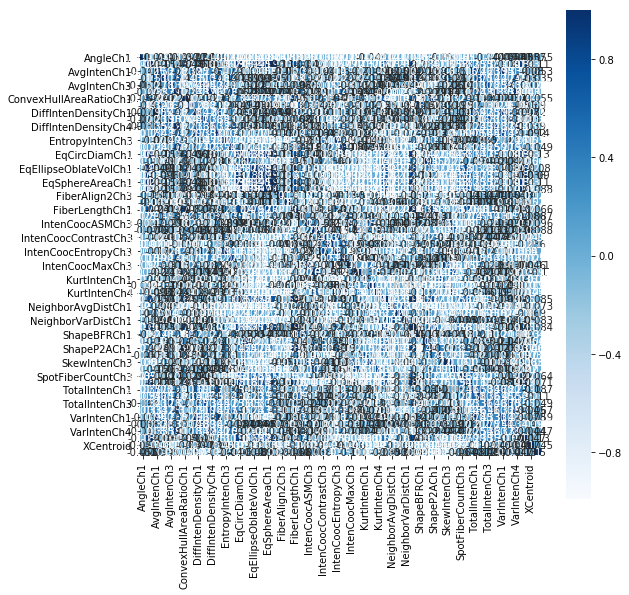

In [52]:
plt.subplots(figsize=(9, 9)) # 设置画面大小
sns.heatmap(segTrainXNC.corr(), annot=True, vmax=1, square=True, cmap="Blues")
plt.savefig('./BluesStateRelation.png')
plt.show()

### 10. What kind of unsupervised learning and what can we expect from it?

#### 无监督学习适用于你具有数据集但无标签的情况。无监督学习采用输入集，并尝试查找数据中的模式。比如，将其组织成群（聚类）或查找异常值（异常检测）。
#### 采用KNN方法。KNN是通过测量不同特征值之间的距离进行分类。它的思路是：如果一个样本在特征空间中的k个最相似(即特征空间中最邻近)的样本中的大多数属于某一个类别，则该样本也属于这个类别，其中K通常是不大于20的整数。KNN算法中，所选择的邻居都是已经正确分类的对象。该方法在定类决策上只依据最邻近的一个或者几个样本的类别来决定待分样本所属的类别。